# Predicting Credit Card Behavior in United States


# Section 1: Business Understanding

## Question 1: Do household and individual characteristics help predicting credit card behavior ?
## Question 2: Are financial literacy and credit card behavior associated ?
## Question 3: Does age group of the individual determine credit card behavior patterns ?

In this research I will use an open source dataset 'The National Financial Capability Study' (NFCS) provided by FINRA. This dataset is a primary data collected from the US citizens with an interval of three years. The first round of survey was conducted in the year of 2009 following the Global financial turmoil. Later on, second round was conducted in 2012, third in 2015 and most recent survey was conducted in 2018. More detail of the dataset can be found [here](https://www.usfinancialcapability.org/) and can be downloaded [here](https://www.usfinancialcapability.org/downloads.php). This dataset includes a wide range of financial, demographic and professional indicators of American Citizens from all the regions and states. Since dataset includes regional information. This result of this analysis might be useful for banks and other financial institutions as well as for Government to devise credit policy in the different regions based on the credit card behavior of the population.


In [4]:
##Importing libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

%matplotlib inline

# Section 2: Data Understanding

## Gather

In [5]:
#Import csv dataset and save it as path object
path ='/Users/rizwanmushtaq/Desktop/Data_Science/Python_Tutorial/NFCS2018_09_19.csv'


In [6]:
#read in data with pandas and save it as df1
df1 = pd.read_csv(path, dtype= 'unicode', decimal=',')


## Exploring the data

In [7]:
#first look at the data, first five rows
df1.head()


,TRACK,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,...,M21_4,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018,2018010001,48,9,4,2,5,11,1,5,...,,1,3,98,98,98,1,0.68368306,0.51964208,1.09518877
1,2018,2018010002,10,5,3,2,2,8,1,6,...,,1,3,98,3,1,98,0.80835753,2.51684077,0.92269329
2,2018,2018010003,44,7,3,2,2,8,1,6,...,,1,1,98,98,1,98,1.02155141,1.89619186,0.67109295
3,2018,2018010004,10,5,3,2,1,7,1,6,...,,98,98,4,4,2,98,0.80835753,2.51684077,0.92269329
4,2018,2018010005,13,8,4,1,2,2,1,6,...,,1,3,98,2,1,98,0.4480747,0.61473322,1.23222123


In [8]:
# dataframe shape, number of rows and number of columns
df1.shape

(108310, 112)

In [9]:
#dataframe information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108310 entries, 0 to 108309
Columns: 112 entries, TRACK to wgt_s3
dtypes: object(112)
memory usage: 92.6+ MB


# Section 3: Data Preparation

## Rename data

In [12]:
#Renaming required columns and saving it as df2
df2 = df1.rename(columns={'A3':'gender','A3Ar_w':'agegrp', "A3B":"agegen",'A4A_new_w': "ethn", 'A5_2015':'edu' , 'A6':'marital' ,  'A7':'living',
     'A7A':'maritalvar',  'A8':'hhincome' ,  'AM21':'armservice',  'AM30':'service',  'AM31':'retired' ,
    'AM22':'spousearm', 'A9':'prof' ,  'A10':'profspouse', 'A21_2015':'ptimestudent',
     'A22_2015':'currentstudent',  'M6':'interest', 'M7':'inflation',  'M8':'bond',  'M31':'cinterest', 'M9':'mortgage', 'M10':'risk',
     'J1':'finsatisfacton',  'J2':'willingrisk', 'J3':'spendingincome',  'J5':'savingunforseen',  'J6':'savingchildedu',
     'J32':'creditrecord', 'B1':'fininc1',  'B2':'fininc2',  'B4':'fininc3',  'B14':'invest',  'E7':'homemort',  'E15_2015':'mortpayment',
    'F2_1':'creditcardpayment', 'F2_3':'minpayment', 'F2_4':'latefee' ,'F2_5': 'limitfee' , 'G20':'unpaidbil' ,
    'G25_2':'paydayloan' , 'G23':'toomuchdebt','M20': 'fineducschool' ,
     'M21_1':'fineduchschool' ,  'M21_2_2015':'fineduccollege' ,  'M21_3':'fineducepmloyer' , 
    'M1_1':'finconfdaytoday' , 'M1_2':'finconf_math' ,  'A14':'mostknowledge' ,  'J20':'howconfident', 'STATEQ':'usstate' ,  'CENSUSDIV':'censusdiv' , 'CENSUSREG':'censusreg' }, errors="raise")


## Select data

In [38]:
#selecting required columns and saving it as df3
df3 = df2[['gender','agegrp', 'ethn', 'edu', 'marital', 'hhincome', 'armservice',  'service',  'retired',
    'spousearm', 'prof', 'profspouse','ptimestudent','currentstudent',  
     'finsatisfacton',  'willingrisk', 'spendingincome', 'savingunforseen', 'savingchildedu',
     'creditrecord', 'fininc1',  'fininc2',  'fininc3',  'invest',  'homemort',  'mortpayment',
    'creditcardpayment', 'minpayment', 'latefee', 'limitfee', 'unpaidbil',
    'paydayloan', 'toomuchdebt', 'fineducschool','fineduchschool',  'fineduccollege',  'fineducepmloyer', 
    'finconfdaytoday', 'finconf_math',  'mostknowledge',  'howconfident', 'usstate',  'censusdiv', 'censusreg',
    'interest', 'inflation', 'bond', 'cinterest', 'mortgage', 'risk']]

## Clean data

In [39]:
##Recoding 99 and 98 and nan (not a number)
df3 = df3.replace('99', np.nan)
df3 = df3.replace('98', np.nan)


In [40]:
##checking data for missing values (nan)
df3.isnull()


,gender,agegrp,ethn,edu,marital,hhincome,armservice,service,retired,spousearm,...,howconfident,usstate,censusdiv,censusreg,interest,inflation,bond,cinterest,mortgage,risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,True
108306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
108307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [41]:
#since we have a large dataset therefore we may remove the missing values. It should also be noted that those missing 
#values are due to non-response of the respondents and we may assume that this is a case of Missing at Random (MAR), 
#here is safe to remove the missing data to get the data ready for machine learning approach.
rows_before = df3.shape[0]
df3 = df3.dropna()
rows_after = df3.shape[0]


In [42]:
#even after removing the data for missing values we still have huge amount of data for the analysis
rows_before - rows_after


72354

## Construct data

In [43]:
#Calculating variables for the analsyis

#interest rate
df3['inter'] = df3['interest'].replace(['2', '3'], '0')

#inflation rate

df3['infl'] = df3['inflation'].replace(['1', '2'], '0')
df3['infl'] = df3['infl'].replace(['3'], '1')

#bond rate

df3['bnd'] = df3['bond'].replace(['1', '3', '4'], '0')
df3['bnd'] = df3['bnd'].replace(['2'], '1')

# Mortgage 

df3['mort'] = df3['mortgage'].replace(['2'], '0')
df3['mort'] = df3['mort'].replace(['2'], '1')

# Compound Interest rate

df3['cinter'] = df3['cinterest'].replace(['1', '3', '4', ' '], '0')
df3['cinter'] = df3['cinter'].replace(['2'], '1')

# Risk
df3['rsk'] = df3['risk'].replace(['1'], '0')
df3['rsk'] = df3['rsk'].replace(['2'], '1')

In [44]:
#Converting variables to numberic form

df3['rsk'] = pd.to_numeric(df3['rsk'])
df3['inter'] = pd.to_numeric(df3['inter'])
df3['infl'] = pd.to_numeric(df3['infl'])
df3['cinter'] = pd.to_numeric(df3['cinter'])
df3['bnd'] = pd.to_numeric(df3['bnd'])
df3['mort'] = pd.to_numeric(df3['mort'])

In [45]:
##adding financial literacy indicators to form a new variable
fl  = df3['rsk'] + df3['mort'] + df3['cinter'] + df3['bnd'] + df3['infl'] + df3['inter']
df3['fl'] = fl

In [46]:
#converting credit variable to numberic
df3['credit'] = pd.to_numeric(df3['creditrecord'], errors='coerce').fillna(0).astype(int)

In [47]:
#checking its mean
df3['credit'].mean()

1.9478807431304928

In [48]:
# applying lambda function to create a binary variable
df3['credit_bin'] = df3['credit'].apply(lambda x: 1 if x >= 2 else 0)

In [49]:
#Checking its frequency
df3['credit_bin'].value_counts()

0    19946
1    16010
Name: credit_bin, dtype: int64

In [50]:
#Converting the variables to pandas numberic form

#df3['censusreg'] = pd.to_numeric(df3['censusreg'], errors='coerce')
df3['gender'] = pd.to_numeric(df3['gender'])
df3['agegrp'] = pd.to_numeric(df3['agegrp'])
df3['ethn'] = pd.to_numeric(df3['ethn'])
df3['edu'] = pd.to_numeric(df3['edu'], errors='coerce').fillna(0).astype(int)
df3['marital'] = pd.to_numeric(df3['marital'])
df3['hhincome'] = pd.to_numeric(df3['hhincome'])
df3['armservice'] = pd.to_numeric(df3['armservice'], errors='coerce').fillna(0).astype(int)
df3['retired'] = pd.to_numeric(df3['retired'], errors='coerce').fillna(0).astype(int)
df3['prof'] = pd.to_numeric(df3['prof'])
df3['profspouse'] = pd.to_numeric(df3['profspouse'], errors='coerce').fillna(0).astype(int)
df3['currentstudent'] = pd.to_numeric(df3['currentstudent'], errors='coerce').fillna(0).astype(int)
df3['finsatisfacton'] = pd.to_numeric(df3['finsatisfacton'])
df3['willingrisk'] = pd.to_numeric(df3['willingrisk'])
df3['savingchildedu'] = pd.to_numeric(df3['savingchildedu'], errors='coerce').fillna(0).astype(int)
df3['finconfdaytoday'] = pd.to_numeric(df3['finconfdaytoday'])
df3['usstate'] = pd.to_numeric(df3['usstate'])
df3['censusdiv'] = pd.to_numeric(df3['censusdiv'])
df3['censusreg'] = pd.to_numeric(df3['censusreg'])

# Section 4: Modeling

In [51]:
## selecting feature variables and saving them to Features
Features = df3[['gender','agegrp','ethn', 'edu', 'marital', 'hhincome', 'armservice', 'retired','prof',
               'profspouse','currentstudent', 'finsatisfacton', 'willingrisk', 'savingchildedu','finconfdaytoday','fl', 'usstate','censusdiv','censusreg']]

In [52]:
# transorming features
X = StandardScaler().fit(Features).transform(Features)
X

array([[ 1.24002122, -1.93622569, -0.54426605, ..., -0.00968403,
        -0.45492667, -0.64656976],
       [-0.80643781, -1.28873421, -0.54426605, ..., -0.34800403,
        -0.06360267,  0.30016677],
       [ 1.24002122,  1.30123169, -0.54426605, ..., -1.09230803,
        -0.06360267,  0.30016677],
       ...,
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629],
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629],
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629]])

In [55]:
# defining target variable as y
y = df3['credit_bin'].values


In [56]:
#here we split the data sets into test and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (28764, 19) (28764,)
Test set: (7192, 19) (7192,)


In [57]:
#In order to apply KNN we need to import library
from sklearn.neighbors import KNeighborsClassifier



# Section 5: Evaluate the Results



## Question 1: Do household and individual characteristics help predicting credit card behavior ?

In [58]:
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [59]:
#predicing with knn
yhat = knn.predict(X_test)
yhat[0:5]


array([0, 0, 1, 1, 0])

In [60]:
#now we test the accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.9624878320122375
Test set Accuracy:  0.9502224694104561


In [61]:
# seting number of clusters and fitting the model
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)


model
 KMeans(n_clusters=12)


In [62]:
# defining centers for the data 
centers = model.cluster_centers_
centers


array([[-2.22111586e-01, -1.12446921e-01, -6.59833069e-02,
        -8.31077349e-01, -3.58267863e-01,  6.24177933e-01,
        -6.87764257e-01, -2.75455179e-01, -5.52668340e-01,
        -1.23329458e-01, -1.61598596e-01,  8.03551925e-02,
         2.33937496e-01, -1.72865097e-02,  2.32203274e-01,
         1.72436670e-01, -2.01665822e-01,  7.98337822e-01,
         8.22773137e-01],
       [ 1.06861587e-01,  1.09351687e+00, -3.68230088e-01,
        -2.59910018e-02, -5.73646655e-01,  1.77805107e-01,
         2.02617244e-01, -2.26736253e-01,  1.35094600e+00,
         1.69769009e+00, -1.61598596e-01,  4.66968202e-01,
        -3.20857685e-01, -5.74439099e-01,  3.64837665e-01,
         2.94385272e-01,  5.21934926e-02,  1.24086999e-02,
         2.87988020e-02],
       [-1.14732897e-01, -8.24640127e-02, -3.07747547e-01,
         5.14180936e-01, -2.67910496e-01,  5.40484322e-01,
         7.53470432e-01, -2.41639898e-01, -5.32448026e-01,
        -2.13803278e-01, -1.56962632e-01,  2.37563776e-01,
    

In [63]:
def pd_centers(featuresUsed, centers):
    
    """
    This Function creates a DataFrame 
    with a column for Cluster Number
    
    Zip with a column called 'prediction' (index)
    
    Convert to pandas data frame for plotting

    """
    colNames = list(featuresUsed)
    colNames.append('prediction')
    
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    
    return P


In [64]:

def parallel_plot(data):
    """
    In this Function we will create Parallel Plots
    it takes input as data and returns plot
    """
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
    
    
    

In [65]:
#find centers of the data
P = pd_centers(Features, centers)
P


,gender,agegrp,ethn,edu,marital,hhincome,armservice,retired,prof,profspouse,currentstudent,finsatisfacton,willingrisk,savingchildedu,finconfdaytoday,fl,usstate,censusdiv,censusreg,prediction
0,-0.222112,-0.112447,-0.065983,-0.831077,-0.358268,0.624178,-0.687764,-0.275455,-0.552668,-0.123329,-0.161599,0.080355,0.233937,-0.017287,0.232203,0.172437,-0.201666,0.798338,0.822773,0
1,0.106862,1.093517,-0.368230,-0.025991,-0.573647,0.177805,0.202617,-0.226736,1.350946,1.697690,-0.161599,0.466968,-0.320858,-0.574439,0.364838,0.294385,0.052193,0.012409,0.028799,1
2,-0.114733,-0.082464,-0.307748,0.514181,-0.267910,0.540484,0.753470,-0.241640,-0.532448,-0.213803,-0.156963,0.237564,0.286377,0.031433,0.228650,0.432145,0.189183,-1.083220,-1.141353,2
3,0.123664,-0.246258,0.107382,-0.469330,0.052321,-0.345419,-0.289449,-0.238648,-0.055075,-0.148839,-0.147136,-0.582359,-0.267022,0.101267,-3.018168,-0.386090,0.088421,-0.034524,-0.025410,3
4,-0.183873,-0.168235,-0.302491,-0.839630,-0.241586,0.323315,-1.366955,-0.277633,-0.386298,-0.145365,-0.161599,-0.175380,0.076938,0.090829,0.129742,0.056547,0.173408,-1.068243,-1.115947,4
5,-0.095200,-0.099457,0.058316,1.282412,-0.235269,0.547244,0.746557,-0.198730,-0.542215,-0.206593,-0.155562,0.321816,0.340095,0.008067,0.228587,0.656135,-0.142051,0.815422,0.827046,5
6,-0.061405,-1.292954,0.666493,0.538849,0.053663,-0.434682,0.262203,-0.039356,-0.368139,-0.563888,5.094874,0.477261,0.765723,0.079301,-0.044715,-0.985935,-0.013464,0.090158,0.070975,6
7,-0.656160,0.727938,-0.151045,1.011744,-0.113802,0.173084,0.050689,3.731678,0.532528,0.507517,-0.134757,0.364325,0.026742,-0.280543,0.251533,0.477469,0.027376,0.131510,0.123484,7
8,-0.015040,-0.712921,0.296765,-0.575758,0.219756,-1.301870,-0.368435,-0.273731,0.090511,-0.591437,-0.160275,-1.028796,-0.599320,-0.666494,-0.146275,-0.396362,-0.004366,0.232706,0.267328,8
9,0.077898,-0.987700,1.074117,0.133916,-0.107790,-0.188244,0.336396,-0.194229,-0.510759,-0.405660,-0.161599,0.698224,0.940233,0.289392,0.034575,-1.536556,-0.146023,0.092017,0.121352,9


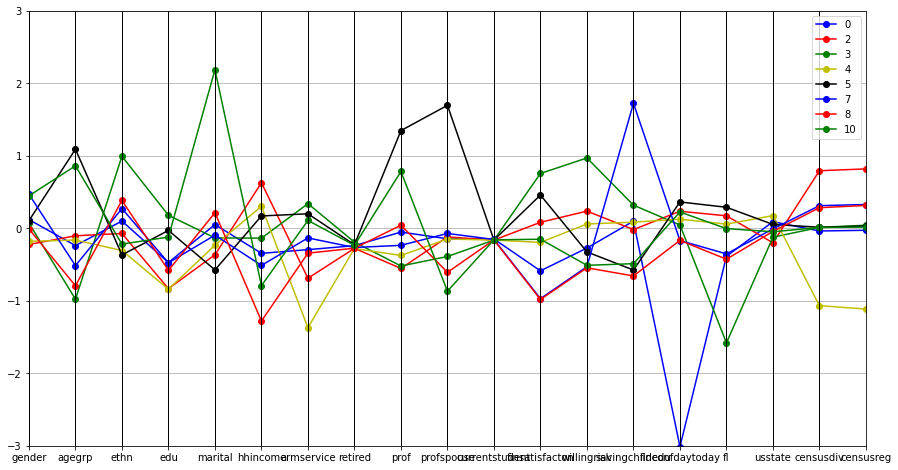

In [37]:
parallel_plot(P[P['edu'] < 0.4])

<ipython-input-38-959eec61ca19>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parallel_plot(P[(P['fl'] > 0.5) & (df3['prof'] > 0.4)])
No handles with labels found to put in legend.


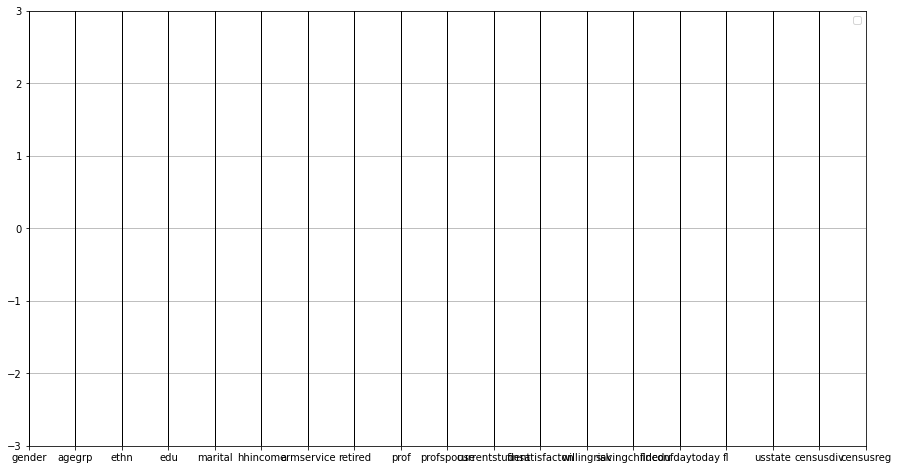

In [38]:
parallel_plot(P[(P['fl'] > 0.5) & (df3['prof'] > 0.4)])

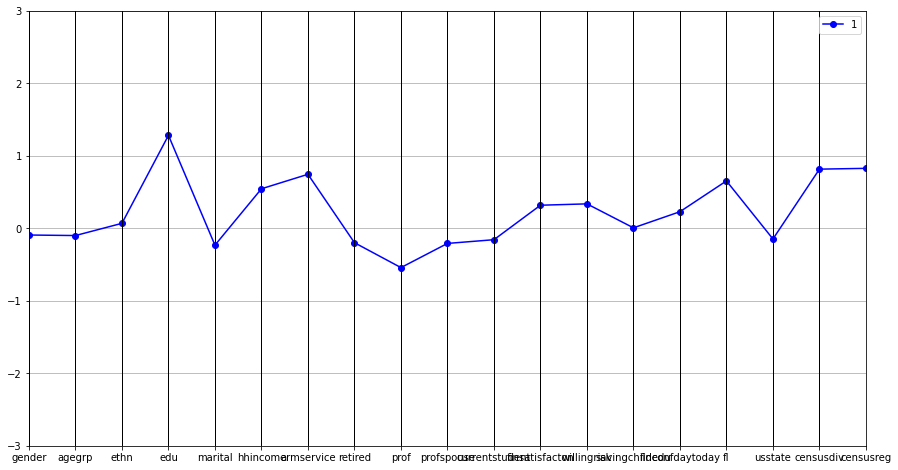

In [39]:
parallel_plot(P[P['fl'] > 0.5])

In [ ]:
# This figure gives us the centroids with normalized data, we can observe a significant number of identical clusters. For instance if we see, red, green, black blue are the identical clusters and preditcted by the same features i.e., demographic and professional

## Question 2: Are financial literacy and credit card behavior associated ?

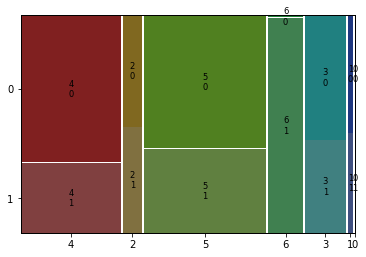

In [41]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas

mosaic(df3, ['fl', 'credit_bin'])
plt.show()

In [ ]:
#Above figure shows mosaic plot, here, I use mosaic plot to examine the association between my DV and other independent variables such as financial literacy. Financial literacy ranges from 0-6, as we can see higher financial literacy falls in category 1 meaning that the respondants with higher financial knowledge tend to possess good credit card behavior and vice versa.

## Question 3: Does age group of the individual determine credit card behavior patterns ?


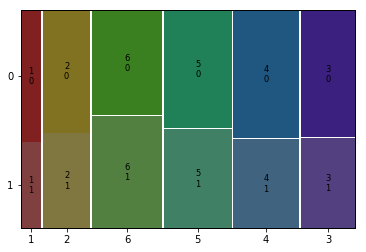

In [42]:
## Age group and credit card behavior
mosaic(df3, [ 'agegrp', 'credit_bin'])
plt.show()

In [ ]:
#Above figure shows mosaic plot of age group and credit card record. Here, I use mosaic plot to examine the association between my DV and other independent variables such as age group of the respondants. Age group ranges from 1-6, as we can see middle age group from 4-6 have better credit record as compared to young group 1-3. Keeping other things constant, we can fairly conclude that credit record improves with age.

In [43]:
#Additional analysis, model evaluation
#function imported from the course
#
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2929  291]
 [  67 3905]]


Confusion matrix, without normalization
[[2929  291]
 [  67 3905]]


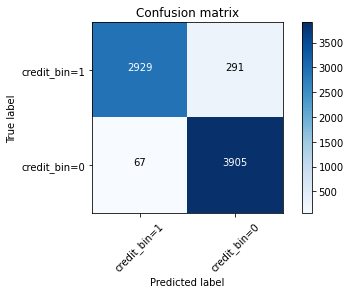

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['credit_bin=1','credit_bin=0'],normalize= False,  title='Confusion matrix')